## Indian Pines Dataset

https://github.com/scespinoza/land-cover-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import image


class IndianPines():

    site3_filename = 'indian_pines/indian_pines_site3.txt'
    site3_gr_filename = 'indian_pines/indian_pines_site3_gr.txt'
    site3_gr_classes_filename = 'indian_pines/AVIRIS_IndianPine_Site3_classes.csv'
    def __init__(self):

        self.raster_data = np.loadtxt(IndianPines.site3_filename).reshape(220, 145, 145)
        self.ground_truth = np.loadtxt(IndianPines.site3_gr_filename)
        self.class_df = pd.read_csv(IndianPines.site3_gr_classes_filename)


    def scale(self):

        scaler = MinMaxScaler()
        raster_array = self.raster_data
        b, h, w = raster_array.shape
        raster_array = scaler.fit_transform(raster_array.reshape((b, h * w)).T) #transformo en una matriz de 2 dimensiones, la original de 3 dimensiones
        return raster_array.reshape(h, w, b)

    def get_cmap(self):
        colors = [tuple(c) for c in (self.class_df[['R', 'G', 'B']] / 255).values]
        cm = ListedColormap(colors)
        return cm

    def show(self, patch=None, bands=[29, 19, 9], ax=None):
        ax = ax or plt.gca()
        if patch:
            img = self.get_patch(*patch, 5)[:, :, bands]
            title = 'Indian Pines Site 3 False Color\nPatch ({}, {})'.format(*patch)
        else:
            img = self.scale()[:, :, bands]
            title = 'Indian Pines Site 3\n False Color'

        ax.imshow(img)
        ax.set_axis_off()
        ax.set_title(title + '\nBands {}, {}, {}'.format(*bands))
    
    def get_patch(self, i, j, p=5):
        scaled_data = self.scale()
        padded_data = np.pad(scaled_data, ((p // 2, p // 2), (p // 2, p // 2), (0, 0)), mode='constant')
        return padded_data[i:i + p,j:j + p, :]
    
    def get_patches(self, p=5):
        scaled_data = self.scale()
        padded_data = np.pad(scaled_data, ((p // 2, p // 2), (p // 2, p // 2), (0, 0)), mode='constant')
        patches = image.extract_patches_2d(padded_data, (p, p))
        return patches          
        
    
    def show_gt(self, ax=None):
        ax = ax or plt.gca()
        gt_data = self.ground_truth
        
        cm = self.get_cmap()
        ax.imshow(gt_data, cmap=cm)
        ax.set_axis_off()
        bound = list(range(0, 17))

        fig = ax.get_figure()
        fig.set_figwidth(7)
        fig.set_figheight(5)
        plt.legend([mpatches.Patch(color=cm(b)) for b in bound[:-1]],
                    [name for name in list(self.class_df['class_name'])[:-1]], 
                    bbox_to_anchor=(1.6, 1),
                    title='Ground Truth\n')
        ax.set_title('Indian Pines Site 3, Ground Truth')
        
        ax.set_axis_off()
        plt.show()
        
    def show_pred(self, y_pred, ax=None):
        ax = ax or plt.gca()
        
        cm = self.get_cmap()
        ax.imshow(y_pred.reshape(145, 145), cmap=cm)
        ax.set_axis_off()
        bound = list(range(0, 17))

        fig = ax.get_figure()
        fig.set_figwidth(7)
        fig.set_figheight(5)
        plt.legend([mpatches.Patch(color=cm(b)) for b in bound[:-1]],
                    [name for name in list(self.class_df['class_name'])[:-1]], 
                    bbox_to_anchor=(1.6, 1),
                    title='Ground Truth\n')
        ax.set_title('Indian Pines Site 3, Ground Truth Prediction')
        
        ax.set_axis_off()
        plt.show()
        
    def get_gt(self, pixel=None):
        gt_data = self.ground_truth
        if pixel:
            return gt_data[pixel[0], pixel[1]]
        else:
            return gt_data.reshape(gt_data.shape[0] * gt_data.shape[1], 1)
    
    def get_dataset(self, n=None):
        if n:
            return self.get_patches()[:n], self.get_gt()[:n]
        else:
            return self.get_patches(), self.get_gt()

if __name__ == '__main__':

    indian_pines = IndianPines()
    indian_pines.show(bands=[29, 19, 9], patch=(0, 0))
    indian_pines.show_gt()

<Figure size 700x500 with 1 Axes>

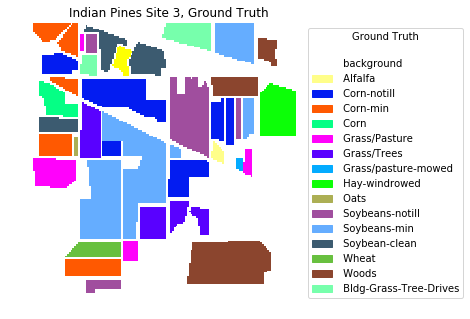

In [2]:
indian_pines = IndianPines()
indian_pines.show_gt()



In [3]:
indian_pines.get_cmap

<bound method IndianPines.get_cmap of <__main__.IndianPines object at 0x0000024CF721C080>>

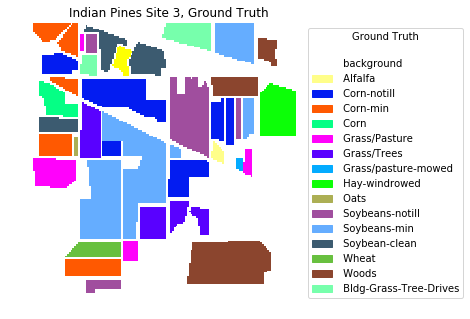

In [4]:
indian_pines.show_gt()

In [8]:
indian_pines.get_dataset

<bound method IndianPines.get_dataset of <__main__.IndianPines object at 0x0000024CF721C080>>

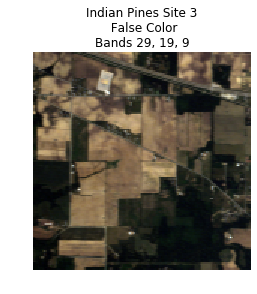

In [9]:
indian_pines.show()

##  Files

### Classes

In [10]:
indian_pines.class_df

,class,R,G,B,class_name
0,0,255,255,255,background
1,1,255,254,137,Alfalfa
2,2,3,28,241,Corn-notill
3,3,255,89,1,Corn-min
4,4,5,255,133,Corn
5,5,255,2,251,Grass/Pasture
6,6,89,1,255,Grass/Trees
7,7,3,171,255,Grass/pasture-mowed
8,8,12,255,7,Hay-windrowed
9,9,172,175,84,Oats


#### Raster Data

In [11]:
indian_pines.raster_data

array([[[3172., 3348., 3687., ..., 3341., 3170., 3172.],
        [3344., 3515., 3518., ..., 3859., 3686., 3512.],
        [3512., 3344., 3512., ..., 3341., 3344., 3510.],
        ...,
        [3324., 2983., 2988., ..., 3332., 3498., 3156.],
        [3161., 3495., 2988., ..., 3156., 3159., 3329.],
        [2979., 2977., 2814., ..., 3153., 3155., 3323.]],

       [[4142., 4266., 4266., ..., 3890., 4130., 3890.],
        [4388., 4264., 4268., ..., 4512., 4264., 4268.],
        [4146., 4389., 4273., ..., 4266., 4262., 4142.],
        ...,
        [3728., 3604., 3612., ..., 4115., 4111., 3991.],
        [3731., 3742., 4114., ..., 3858., 3858., 3866.],
        [3728., 3728., 3728., ..., 3864., 4104., 3860.]],

       [[4506., 4502., 4421., ..., 4320., 4320., 4316.],
        [4334., 4592., 4423., ..., 4605., 4690., 4597.],
        [4416., 4416., 4420., ..., 4509., 4496., 4230.],
        ...,
        [4002., 3829., 3913., ..., 4103., 4103., 4103.],
        [3834., 4011., 4011., ..., 4016., 410

#### Ground Truth

In [12]:
indian_pines.ground_truth

array([[3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Scale the Data

In [13]:
scaled = indian_pines.scale()
scaled

array([[[0.28361345, 0.29333921, 0.31600295, ..., 0.37777778,
         0.69642857, 0.46296296],
        [0.37605042, 0.34803705, 0.31452802, ..., 0.47777778,
         0.69642857, 0.37037037],
        [0.55409664, 0.34803705, 0.28466077, ..., 0.48888889,
         0.625     , 0.53703704],
        ...,
        [0.37237395, 0.18217909, 0.24741888, ..., 0.38888889,
         0.60714286, 0.83333333],
        [0.28256303, 0.28804588, 0.24741888, ..., 0.42222222,
         0.69642857, 0.57407407],
        [0.28361345, 0.18217909, 0.24594395, ..., 0.53333333,
         0.625     , 0.64814815]],

       [[0.37394958, 0.40185267, 0.25258112, ..., 0.48888889,
         0.44642857, 0.64814815],
        [0.4637605 , 0.34715483, 0.34771386, ..., 0.58888889,
         0.60714286, 0.74074074],
        [0.46533613, 0.34891928, 0.28539823, ..., 0.44444444,
         0.60714286, 0.74074074],
        ...,
        [0.64443277, 0.45655051, 0.35250737, ..., 0.54444444,
         0.60714286, 0.2962963 ],
        [0.5

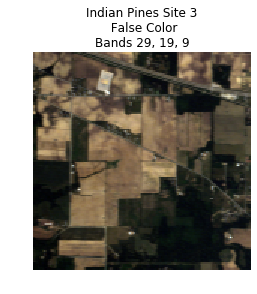

In [14]:
indian_pines.show()

### Add Padding

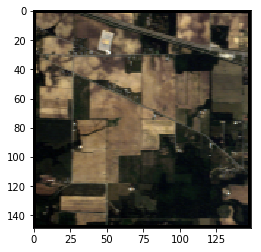

In [15]:
p = 5
padded = np.pad(scaled, ((p // 2, p // 2), (p // 2, p // 2), (0, 0)), mode='constant')
plt.imshow(padded[:, :, [29, 19, 9]])

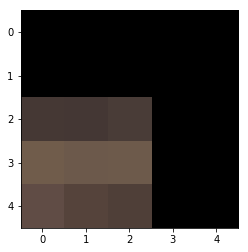

In [16]:
i, j = 0, 144
patch = padded[i:i + p,j:j + p, :]
plt.imshow(patch[:, :, [29, 19, 9]])

### Full Dataset

In [17]:
X, y = indian_pines.get_dataset()
X.shape

(21025, 5, 5, 220)

In [18]:
y.shape

(21025, 1)

### Data Augmentation

In [19]:
#from LULC_CNN_TF import LULC_CNN as CNN
#from sklearn.preprocessing import OneHotEncoder
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

def rotate(X, y, angle=180):
    imgs = X.copy()
    X_aug = X.copy()
    y_aug = y.copy()
    mask = [y != 0]
    with tf.Session() as sess:
        
        for i in range(1, 360 // angle):
            print('Rotating {}° degrees'.format(i * angle))
            rotated_X = sess.run(tf.contrib.image.rotate(imgs[mask], math.radians(i * angle)))
            X_aug = np.append(X_aug, rotated_X, axis=0)
            y_aug = np.append(y_aug, y[mask], axis=0)
            
            
    return X_aug, y_aug

if __name__ == '__main__':
    
    ip = IndianPines()

    img = ip.get_patch(70, 80)
    X_aug, y_aug = rotate(img[np.newaxis, :], np.array([1]), 45)
    fig, ax = plt.subplots(2, 4)
    
    for i, axi in enumerate(ax.flatten()):
    
        axi.imshow(X_aug[i][:,  :, [29, 19, 9]])
        axi.set_title('{}° rotation'.format(i * 45))
        axi.set_axis_off()
    
    fig.suptitle('Data Augmentation')

ModuleNotFoundError: No module named 'tensorflow'